Study of Chilean peso (CLP) vs. Copper price before and after the Chilean civil unrest in October 2019<br>
Licensed under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

# Main libraries
We start by importing the main libraires we shall use:

- the [numpy](https://numpy.org/) library (for arrays operations)
- the [pandas](https://pandas.pydata.org/) library (for data analysis)
- the [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) interface (for MATLAB-like plots)
- the [statsmodels.formula.api](https://www.statsmodels.org/stable/api.html) API (for statistics)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import statsmodels.formula.api as smf

First we note from a graph of bloomberg.com that the Chilean peso seems to have decoupled from copper prices after the Chilean civil unrest of October 2019:

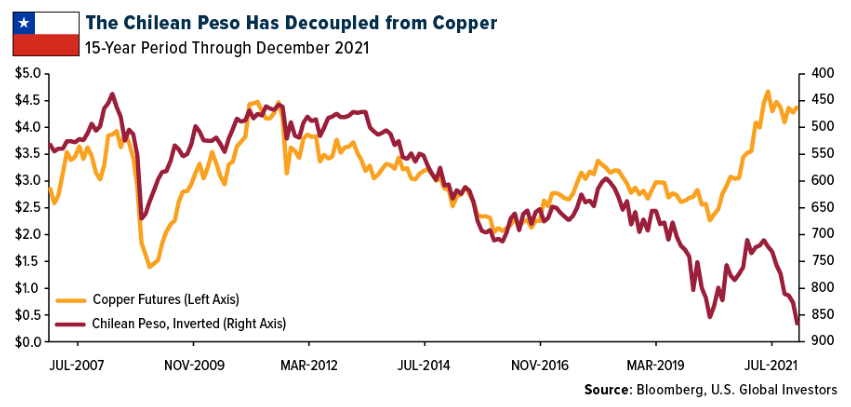

In [19]:
# Plotting the graph of Bloomberg

chart = img.imread('Bloomberg.png')
plt.figure(figsize=(15, 15))
plt.imshow(chart)
plt.axis('off')
plt.show()

# Dataset preparation
We download from investing.com the csv files with the data of the currency pair [USD-CLP](https://www.investing.com/currencies/usd-clp-historical-data) and [copper price](https://www.investing.com/commodities/copper-historical-data) before the civil unrest, between Oct 06, 2017 and Oct 04, 2019.

In [3]:
# Storing the csv files in DataFrames "pesos_before" and "copper_before", and ordering them by ascending date

pesos_before = pd.read_csv('CLP_before.csv')
copper_before = pd.read_csv('Copper_before.csv')
pesos_before, copper_before = pesos_before[::-1], copper_before[::-1]

In [4]:
# Merging the data into one DataFrame "df_before", with "Date" as (inner) merge criterion

df_before = pd.merge(left=pesos_before, right=copper_before, left_on='Date', right_on='Date')
df_before = [df_before['Date'], df_before['Price_x'], df_before['Price_y']]
headers = ['Date', 'USD_CLP', 'Copper_price']
df_before = pd.concat(df_before, axis=1, keys=headers)

In [5]:
# Displaying the descriptive statistics of the DataFrame df_before

df_before.describe()

,USD_CLP,Copper_price
count,512.000000,512.000000
mean,658.501465,2.961036
std,35.329261,0.226259
min,587.730000,2.532000
25%,631.700000,2.768000
50%,663.720000,2.896250
75%,683.675000,3.195000
max,728.860000,3.416500


In [6]:
# Importing the function "display" from IPython.display module to display multiple tables in one cell
# Displaying Pearson, Spearman and Kendall correlations between "USD-CLP" and "Copper price" in DataFrame df_before

from IPython.display import display

display(df_before.corr())
display(df_before.corr(method='spearman'))
display(df_before.corr(method='kendall'))

,USD_CLP,Copper_price
USD_CLP,1.00000,-0.92441
Copper_price,-0.92441,1.00000


,USD_CLP,Copper_price
USD_CLP,1.000000,-0.920883
Copper_price,-0.920883,1.000000


,USD_CLP,Copper_price
USD_CLP,1.000000,-0.747647
Copper_price,-0.747647,1.000000


# Least squares regression
Now we perform an [ordinary least squares regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) between "USD-CLP" and "Copper price". First an OLS object is generated, and then the fit() method is applied for fitting the regression line to the data. See more details on [geeksforgeeks.org](https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/).

In [7]:
# The attribute "params" returns the list of estimated parameters for the model.
# These are the intercept and the slope of the OLS regression, params[0] and params[1], respectively.

fit_before = smf.ols(formula='USD_CLP~Copper_price', data=df_before).fit()
intercept_before, slope_before = fit_before.params[0], fit_before.params[1]

In [8]:
# Equation of OLS regression (with column "Best_fit"), and error between "Best_fit" and observed data "USD_CLP"

df_before['Best_fit'] = slope_before*df_before['Copper_price'] + intercept_before
df_before['Error'] = df_before['USD_CLP'] - df_before['Best_fit']
error_before = round((df_before['Error']**2).sum(), 1)
df_before.head()

,Date,USD_CLP,Copper_price,Best_fit,Error
0,"Oct 06, 2017",633.22,3.1135,636.494462,-3.274462
1,"Oct 09, 2017",633.40,3.1170,635.989263,-2.589263
2,"Oct 10, 2017",629.55,3.1480,631.514648,-1.964648
3,"Oct 11, 2017",626.75,3.1775,627.256547,-0.506547
4,"Oct 12, 2017",624.47,3.2020,623.720158,0.749842


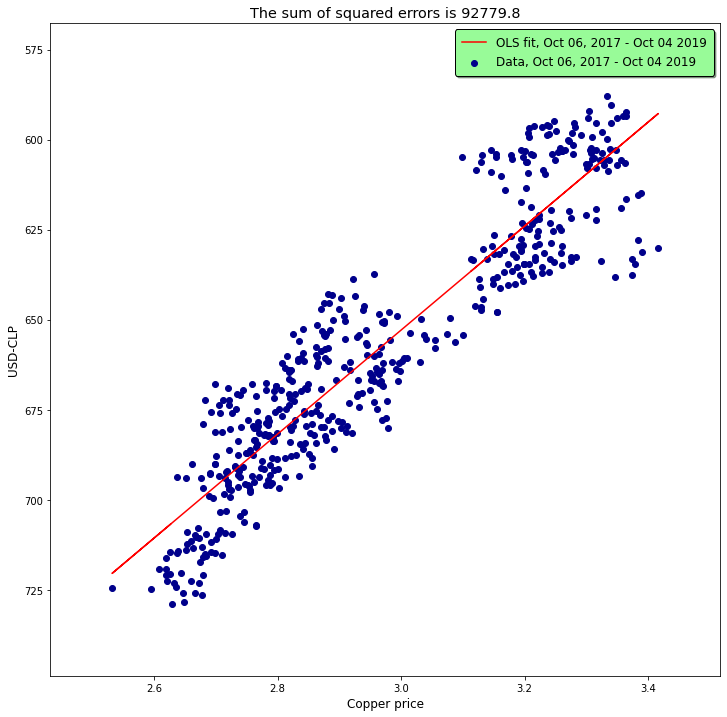

In [9]:
# Plot of the scattered data, the OLS regression, and the sum of squared errors

plt.figure(figsize=(12, 12))

plt.plot(df_before['Copper_price'], df_before['Best_fit'], color='red', label='OLS fit, Oct 06, 2017 - Oct 04 2019')
plt.scatter(df_before['Copper_price'], df_before['USD_CLP'], color='darkblue', label='Data, Oct 06, 2017 - Oct 04 2019')

# Parameters, title and legend of the plot

plt.legend(fontsize='large', borderpad=0.6, shadow=True, facecolor='palegreen', edgecolor='k')
plt.title('The sum of squared errors is {}'.format(error_before), size='x-large')
plt.xlim(df_before['Copper_price'].min()-0.1, df_before['Copper_price'].max()+0.1)
plt.ylim(df_before['USD_CLP'].max()+20, df_before['USD_CLP'].min()-20)
plt.xlabel("Copper price", size='large')
plt.ylabel("USD-CLP", size='large')

plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.show()

We give with the summary() method a summary of the performance of the model before the civil unrest. The summary contains the p-value of "Copper_price", the confidence interval and the coefficient of determination R-squared.

In [10]:
fit_before.summary(title='OLS Regression Results Before Civil Unrest')

<class 'statsmodels.iolib.summary.Summary'>
"""
                  OLS Regression Results Before Civil Unrest                  
==============================================================================
Dep. Variable:                USD_CLP   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     2996.
Date:                Fri, 27 May 2022   Prob (F-statistic):          1.22e-215
Time:                        16:46:23   Log-Likelihood:                -2057.6
No. Observations:                 512   AIC:                             4119.
Df Residuals:                     510   BIC:                             4128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1085.9046      7.831    138.663      0.000    1070.519    1101.290
Copper_price  -144.3424      2.637    -54.735      0.000    -149.523    -139.162
==============================================================================
Omnibus:                        8.791   Durbin-Watson:                   0.132
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                5.680
Skew:                          -0.091   Prob(JB):                       0.0584
Kurtosis:                       2.517   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dataset preparation
We do now the same analysis for the observed data after the civil unrest, during the time frame Oct 08, 2019 - Oct 08 2021.

In [11]:
# Storing the csv files in DataFrames "pesos_after" and "copper_after", and ordering them by ascending date

pesos_after = pd.read_csv('CLP_after.csv')
copper_after = pd.read_csv('Copper_after.csv')
pesos_after, copper_after = pesos_after[::-1], copper_after[::-1]

In [12]:
# Merging the data into one DataFrame "df_after", with "Date" as (inner) merge criterion

df_after = pd.merge(left=pesos_after, right=copper_after, left_on='Date', right_on='Date')
df_after = [df_after['Date'], df_after['Price_x'], df_after['Price_y']]
headers = ['Date', 'USD_CLP', 'Copper_price']
df_after = pd.concat(df_after, axis=1, keys=headers)

In [13]:
# Displaying the descriptive statistics of the DataFrame df_after

df_after.describe()

,USD_CLP,Copper_price
count,522.000000,522.000000
mean,767.771705,3.347700
std,40.766959,0.734862
min,694.880000,2.150000
25%,733.125000,2.715875
50%,770.495000,3.081250
75%,792.590000,4.124875
max,867.800000,4.759500


In [14]:
# Importing the function "display" from IPython.display module to display multiple tables in one cell
# Displaying Pearson, Spearman and Kendall correlations between "USD-CLP" and "Copper price" in DataFrame df_after

display(df_after.corr())
display(df_after.corr(method='spearman'))
display(df_after.corr(method='kendall'))

,USD_CLP,Copper_price
USD_CLP,1.000000,-0.639198
Copper_price,-0.639198,1.000000


,USD_CLP,Copper_price
USD_CLP,1.000000,-0.642616
Copper_price,-0.642616,1.000000


,USD_CLP,Copper_price
USD_CLP,1.000000,-0.486477
Copper_price,-0.486477,1.000000


# Least squares regression

In [15]:
# The attribute "params" returns the list of estimated parameters for the model.
# These are the intercept and the slope of the OLS regression, params[0] and params[1], respectively.

fit_after = smf.ols(formula='USD_CLP~Copper_price', data=df_after).fit()
intercept_after, slope_after = fit_after.params[0], fit_after.params[1]

In [16]:
# Equation of OLS regression (with column "Best_fit"), and error between "Best_fit" and observed data "USD_CLP"

df_after['Best_fit'] = slope_after*df_after['Copper_price'] + intercept_after
df_after['Error'] = df_after['USD_CLP'] - df_after['Best_fit']
error_after = round((df_after['Error']**2).sum(), 1)
df_after.head()

,Date,USD_CLP,Copper_price,Best_fit,Error
0,"Oct 08, 2019",725.24,2.6350,793.044021,-67.804021
1,"Oct 09, 2019",723.20,2.6315,793.168131,-69.968131
2,"Oct 10, 2019",718.48,2.6720,791.732003,-73.252003
3,"Oct 11, 2019",709.48,2.6890,791.129184,-81.649184
4,"Oct 14, 2019",712.43,2.6950,790.916425,-78.486425


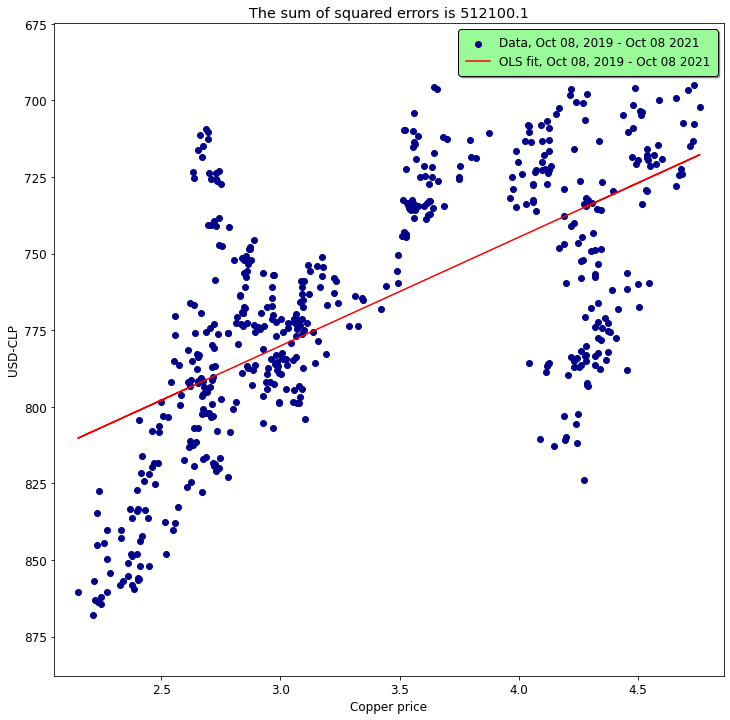

In [17]:
# Plot of the scattered data, the OLS regression, and the sum of squared errors

plt.figure(figsize=(12, 12))
plt.scatter(df_after['Copper_price'], df_after['USD_CLP'], color='darkblue', label='Data, Oct 08, 2019 - Oct 08 2021')
plt.plot(df_after['Copper_price'], df_after['Best_fit'], color='red', label='OLS fit, Oct 08, 2019 - Oct 08 2021')

# Parameters, title and legend of the plot

plt.legend(fontsize='large', borderpad=0.6, shadow=True, facecolor='palegreen', edgecolor='k')
plt.title('The sum of squared errors is {}'.format(error_after), size='x-large')
plt.xlim(df_after['Copper_price'].min()-0.1, df_after['Copper_price'].max()+0.1)
plt.ylim(df_after['USD_CLP'].max()+20, df_after['USD_CLP'].min()-20)
plt.xlabel("Copper price", size='large')
plt.ylabel("USD-CLP", size='large')

plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.show()

We give with the summary() method a summary of the performance of the model after the civil unrest. The summary contains the p-value of "Copper_price", the confidence interval and the coefficient of determination R-squared.

In [18]:
fit_after.summary(title='OLS Regression Results After Civil Unrest')

<class 'statsmodels.iolib.summary.Summary'>
"""
                  OLS Regression Results After Civil Unrest                   
==============================================================================
Dep. Variable:                USD_CLP   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     359.2
Date:                Fri, 27 May 2022   Prob (F-statistic):           2.70e-61
Time:                        16:46:23   Log-Likelihood:                -2538.6
No. Observations:                 522   AIC:                             5081.
Df Residuals:                     520   BIC:                             5090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      886.4810      6.412    138.252      0.000     873.884     899.078
Copper_price   -35.4599      1.871    -18.953      0.000     -39.135     -31.784
==============================================================================
Omnibus:                        2.696   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.693
Skew:                           0.138   Prob(JB):                        0.260
Kurtosis:                       2.782   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""